<a href="https://colab.research.google.com/github/lecuevasp/Lazzy_Predict/blob/rama1/20241204_generacion_modelos_automatizados_lazzy_predict_ml_supervisado_mod_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|<img src="https://www.udp.cl/cms/wp-content/uploads/2021/06/UDP_LogoRGB_2lineas_Color_SinFondo.png" width="500" height="100">| <p> Ciencias de Datos para la Economía</p>  <p> Ingeniería Comercial </p> <p>Unidad II: Machine Learning</p> <p>Lazzy_Classifier: Modelos de Clasificación</p>|
|:---: | :--- |

## Lazy Classifier aprendizaje automático

- Ejecutar modelos de aprendizaje automático uno por uno puede ser una tarea compleja.

- Saber cual o cuales modelos son los que mejor se ajustan a nuestro problema puede ser una decisión compleja.

- Hasta el momento hemos revisado algunos modelos, pero no son todos lo que existen en realidad.

- La biblioteca **Lazzy Classifier** nos ofrece ejecutar distintos modelos usando unas pocas líneas de código.

- Es fácil de usar y fácil de instalar. Lazy Classifier es de código abierto y se publica bajo la licencia MIT.


In [ ]:
#Intalación
!pip install lazypredict

In [ ]:
#@title Importando las bibliotecas
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
#@title Importar datos
df = pd.read_csv('/content/drive/MyDrive/UDP-CcsDatos-2024-2Semestre/Datos/diabetes_knn_3.csv', sep = '|')

In [ ]:
df.shape

(768, 9)

In [ ]:
#@title Primeros Registros
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,125.33,33.60,0.63,50,1
1,1,85.00,66.00,29.00,66.67,26.60,0.35,31,0
2,8,183.00,64.00,30.00,195.00,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [ ]:
#@title Seleccionar columnas relevantes
y = df['Outcome']

In [ ]:
X = df.drop(columns = 'Outcome')

In [ ]:
# Segmentación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [ ]:
# Instanciar modelo
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [ ]:
#Entrenado los modelos de regresión
models, predictions = LazyClassifier().fit(X_train_std, X_test_std, y_train, y_test)

100%|██████████| 31/31 [00:01<00:00, 19.36it/s]


[LightGBM] [Info] Number of positive: 211, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343648 -> initscore=-0.647078
[LightGBM] [Info] Start training from score -0.647078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Aplicación LazyClassifier

- Esta biblioteca nos ofrece 27 modelos distintos de aprendizaje supervisado para regresion.

- La aplicación de la función nos entrega 2 resultados de salida:

  - models: Se muestran los resultados para los datos de entrenamiento

  - predictions: Se muestran los resultados para los datos de test.

- Dentro de las métricas que podemos obtener el Accuracy, F1 Score, entre otros.

- Por medio del atributo *custom_metric*. podemos elegir la métrica.

In [ ]:
models[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.77,0.73,0.73,0.76,0.02
LinearDiscriminantAnalysis,0.77,0.73,0.73,0.76,0.05
RidgeClassifierCV,0.77,0.73,0.73,0.76,0.02
RidgeClassifier,0.77,0.73,0.73,0.76,0.03
LogisticRegression,0.77,0.73,0.73,0.76,0.03
CalibratedClassifierCV,0.76,0.72,0.72,0.75,0.05
SVC,0.75,0.72,0.72,0.75,0.03
NuSVC,0.75,0.72,0.72,0.75,0.03
NearestCentroid,0.72,0.72,0.72,0.72,0.02


In [ ]:
predictions[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.77,0.73,0.73,0.76,0.02
LinearDiscriminantAnalysis,0.77,0.73,0.73,0.76,0.05
RidgeClassifierCV,0.77,0.73,0.73,0.76,0.02
RidgeClassifier,0.77,0.73,0.73,0.76,0.03
LogisticRegression,0.77,0.73,0.73,0.76,0.03
CalibratedClassifierCV,0.76,0.72,0.72,0.75,0.05
SVC,0.75,0.72,0.72,0.75,0.03
NuSVC,0.75,0.72,0.72,0.75,0.03
NearestCentroid,0.72,0.72,0.72,0.72,0.02


In [ ]:
len(models)

27

## Graficar métricas

Finalmente, graficaremos la metrica seleccionada usando la biblioteca de seaborn

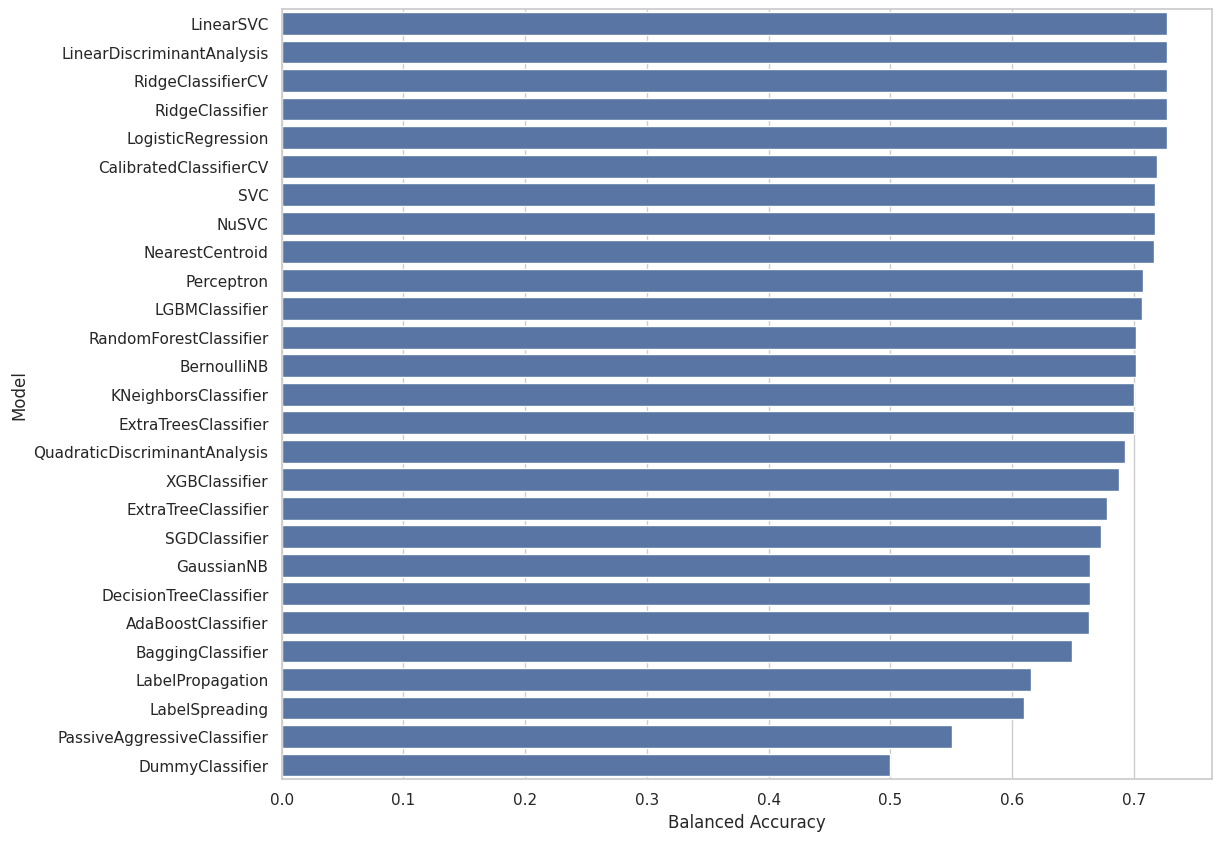

In [ ]:
#Visualizando el mejor modelo
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)